w0=0.5, w1=1.1, w2=89.0
SD=2.546 cm


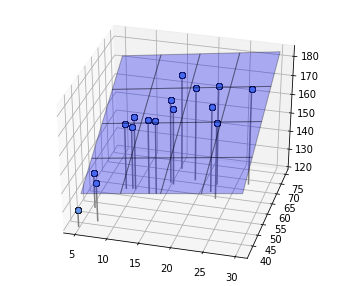

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# 2차원 데이터의 표시 ------------------------
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]],
                [120, t[i]], color='gray')
        ax.plot(x0, x1, t, 'o',
                color='cornflowerblue', markeredgecolor='black',
                markersize=6, markeredgewidth=0.5)
        ax.view_init(elev=35, azim=-75)

#면의 표시 ----------------------------------
def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0]*px0 + w[1] * px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3,
                    color='blue', edgecolor='black') 
    
#면의 MSE -----------------------------------
def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2] # (A)
    mse = np.mean((y - t)**2)
    return mse
    
    
# 해석해 ------------------------------------
def fit_Dlinear(X, t):
    XT= X.T
    XTX_inv = np.linalg.inv(XT.dot(X))
    XTX_invX = XTX_inv.dot(XT)
    w = XTX_invX.dot(t)
    return w



# 데이터 생성 --------------------------------
np.random.seed(seed=1) # 난수를 고정
X_min = 4 # X의 하한(표시 용)
X_max = 30 # X의 상한(표시 용)
X_n = 16 # X의 상한(표시 용)
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2] # 생성 매개 변수
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) \
+ 4 * np.random.randn(X_n) # (A)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T) # (B)


# 2차원 데이터 생성 --------------------------
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed=1) # 난수를 고정
X1 = 23 * (T / 100)**2 + 2 * np.random.randn(X_n)
X1_min = 40
X1_max = 75


# 메인 ------------------------------------
dim = 3
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')

# XX 
XX = np.ones((len(X0),3))
XX[:,0] = X0
XX[:,1] = X1

W = fit_Dlinear(XX,T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()